In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#reading and splitting in groups of 1 image
data = open("semeion_data")
data = data.read()
list_data = data.split('\n')

#parsing(making image into 256 size vector)
image_list = []
images = [None] * 1593
listNumb = []
for image in range(1593):
    image_list = list_data[image].split(' ')
    temp = [None] * 256

    for elem in range(256):
        temp[elem] = float(image_list[elem])

    images[image]=temp
    listNumb.append(0)
    for i in range(10):
        if float(image_list[256 + i]) > 0:
            listNumb[image] = i

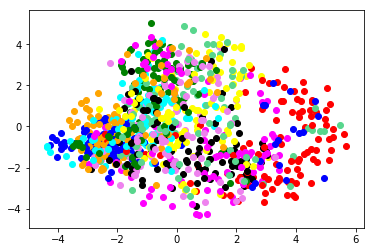

In [2]:
#graphics
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(images))

for i in range(5):
    plt.scatter(transformed[i*200:i*200+20][0], transformed[i*200:i*200+20][1], label='Class 0', c='red')
    plt.scatter(transformed[i*200+20:i*200+40][0], transformed[i*200+20:i*200+40][1], label='Class 1', c='blue')
    plt.scatter(transformed[i*200+40:i*200+60][0], transformed[i*200+40:i*200+60][1], label='Class 2', c='cyan')
    plt.scatter(transformed[i*200+60:i*200+80][0], transformed[i*200+60:i*200+80][1], label='Class 3', c='green')
    plt.scatter(transformed[i*200+80:i*200+100][0], transformed[i*200+80:i*200+100][1], label='Class 4', c='black')
    plt.scatter(transformed[i*200+100:i*200+120][0], transformed[i*200+100:i*200+120][1], label='Class 5', c='yellow')
    plt.scatter(transformed[i*200+120:i*200+140][0], transformed[i*200+120:i*200+140][1], label='Class 6', c='magenta')
    plt.scatter(transformed[i*200+140:i*200+160][0], transformed[i*200+140:i*200+160][1], label='Class 7', c='orange')
    plt.scatter(transformed[i*200+160:i*200+180][0], transformed[i*200+160:i*200+180][1], label='Class 8', c='violet')
    plt.scatter(transformed[i*200+180:i*200+200][0], transformed[i*200+180:i*200+200][1], label='Class 9', c='#58d68d')
plt.show()

In [3]:
#train split
from sklearn.model_selection import train_test_split

y = listNumb
X = images

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=0)

#knn in action
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
#пробовал другие метрики, но метрика минковского лучшая
parameters = {'n_neighbors':[2,4,6,8,10,12,14,16,18],
              'leaf_size':[10,20,30,40]}
gridClf = GridSearchCV(model,parameters,cv=3,verbose=3)
gridClf.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] leaf_size=10, n_neighbors=2 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  leaf_size=10, n_neighbors=2, score=0.8272980501392758, total=   0.2s
[CV] leaf_size=10, n_neighbors=2 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  leaf_size=10, n_neighbors=2, score=0.819718309859155, total=   0.1s
[CV] leaf_size=10, n_neighbors=2 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  leaf_size=10, n_neighbors=2, score=0.8441926345609065, total=   0.1s
[CV] leaf_size=10, n_neighbors=4 .....................................


[CV]  leaf_size=10, n_neighbors=4, score=0.8467966573816156, total=   0.1s
[CV] leaf_size=10, n_neighbors=4 .....................................


[CV]  leaf_size=10, n_neighbors=4, score=0.8422535211267606, total=   0.1s
[CV] leaf_size=10, n_neighbors=4 .....................................


[CV]  leaf_size=10, n_neighbors=4, score=0.8810198300283286, total=   0.1s
[CV] leaf_size=10, n_neighbors=6 .....................................


[CV]  leaf_size=10, n_neighbors=6, score=0.8607242339832869, total=   0.1s
[CV] leaf_size=10, n_neighbors=6 .....................................


[CV]  leaf_size=10, n_neighbors=6, score=0.856338028169014, total=   0.1s
[CV] leaf_size=10, n_neighbors=6 .....................................


[CV]  leaf_size=10, n_neighbors=6, score=0.8810198300283286, total=   0.2s
[CV] leaf_size=10, n_neighbors=8 .....................................


[CV]  leaf_size=10, n_neighbors=8, score=0.8690807799442897, total=   0.1s
[CV] leaf_size=10, n_neighbors=8 .....................................


[CV]  leaf_size=10, n_neighbors=8, score=0.8619718309859155, total=   0.1s
[CV] leaf_size=10, n_neighbors=8 .....................................


[CV]  leaf_size=10, n_neighbors=8, score=0.8838526912181303, total=   0.1s
[CV] leaf_size=10, n_neighbors=10 ....................................


[CV]  leaf_size=10, n_neighbors=10, score=0.8746518105849582, total=   0.1s
[CV] leaf_size=10, n_neighbors=10 ....................................


[CV]  leaf_size=10, n_neighbors=10, score=0.8507042253521127, total=   0.1s
[CV] leaf_size=10, n_neighbors=10 ....................................


[CV]  leaf_size=10, n_neighbors=10, score=0.886685552407932, total=   0.1s
[CV] leaf_size=10, n_neighbors=12 ....................................


[CV]  leaf_size=10, n_neighbors=12, score=0.871866295264624, total=   0.1s
[CV] leaf_size=10, n_neighbors=12 ....................................


[CV]  leaf_size=10, n_neighbors=12, score=0.8619718309859155, total=   0.1s
[CV] leaf_size=10, n_neighbors=12 ....................................


[CV]  leaf_size=10, n_neighbors=12, score=0.8838526912181303, total=   0.1s
[CV] leaf_size=10, n_neighbors=14 ....................................


[CV]  leaf_size=10, n_neighbors=14, score=0.8579387186629527, total=   0.1s
[CV] leaf_size=10, n_neighbors=14 ....................................


[CV]  leaf_size=10, n_neighbors=14, score=0.856338028169014, total=   0.1s
[CV] leaf_size=10, n_neighbors=14 ....................................


[CV]  leaf_size=10, n_neighbors=14, score=0.886685552407932, total=   0.1s
[CV] leaf_size=10, n_neighbors=16 ....................................


[CV]  leaf_size=10, n_neighbors=16, score=0.8662952646239555, total=   0.1s
[CV] leaf_size=10, n_neighbors=16 ....................................


[CV]  leaf_size=10, n_neighbors=16, score=0.8619718309859155, total=   0.1s
[CV] leaf_size=10, n_neighbors=16 ....................................


[CV]  leaf_size=10, n_neighbors=16, score=0.8810198300283286, total=   0.1s
[CV] leaf_size=10, n_neighbors=18 ....................................


[CV]  leaf_size=10, n_neighbors=18, score=0.871866295264624, total=   0.1s
[CV] leaf_size=10, n_neighbors=18 ....................................


[CV]  leaf_size=10, n_neighbors=18, score=0.8619718309859155, total=   0.1s
[CV] leaf_size=10, n_neighbors=18 ....................................


[CV]  leaf_size=10, n_neighbors=18, score=0.8838526912181303, total=   0.1s
[CV] leaf_size=20, n_neighbors=2 .....................................


[CV]  leaf_size=20, n_neighbors=2, score=0.8272980501392758, total=   0.0s
[CV] leaf_size=20, n_neighbors=2 .....................................


[CV]  leaf_size=20, n_neighbors=2, score=0.819718309859155, total=   0.0s
[CV] leaf_size=20, n_neighbors=2 .....................................


[CV]  leaf_size=20, n_neighbors=2, score=0.8441926345609065, total=   0.0s
[CV] leaf_size=20, n_neighbors=4 .....................................


[CV]  leaf_size=20, n_neighbors=4, score=0.8467966573816156, total=   0.0s
[CV] leaf_size=20, n_neighbors=4 .....................................


[CV]  leaf_size=20, n_neighbors=4, score=0.8366197183098592, total=   0.0s
[CV] leaf_size=20, n_neighbors=4 .....................................


[CV]  leaf_size=20, n_neighbors=4, score=0.8810198300283286, total=   0.0s
[CV] leaf_size=20, n_neighbors=6 .....................................


[CV]  leaf_size=20, n_neighbors=6, score=0.8579387186629527, total=   0.0s
[CV] leaf_size=20, n_neighbors=6 .....................................


[CV]  leaf_size=20, n_neighbors=6, score=0.8591549295774648, total=   0.0s
[CV] leaf_size=20, n_neighbors=6 .....................................


[CV]  leaf_size=20, n_neighbors=6, score=0.8810198300283286, total=   0.0s
[CV] leaf_size=20, n_neighbors=8 .....................................


[CV]  leaf_size=20, n_neighbors=8, score=0.8662952646239555, total=   0.0s
[CV] leaf_size=20, n_neighbors=8 .....................................


[CV]  leaf_size=20, n_neighbors=8, score=0.8619718309859155, total=   0.0s
[CV] leaf_size=20, n_neighbors=8 .....................................


[CV]  leaf_size=20, n_neighbors=8, score=0.8753541076487252, total=   0.0s
[CV] leaf_size=20, n_neighbors=10 ....................................


[CV]  leaf_size=20, n_neighbors=10, score=0.8774373259052924, total=   0.0s
[CV] leaf_size=20, n_neighbors=10 ....................................


[CV]  leaf_size=20, n_neighbors=10, score=0.847887323943662, total=   0.0s
[CV] leaf_size=20, n_neighbors=10 ....................................


[CV]  leaf_size=20, n_neighbors=10, score=0.8838526912181303, total=   0.0s
[CV] leaf_size=20, n_neighbors=12 ....................................


[CV]  leaf_size=20, n_neighbors=12, score=0.8690807799442897, total=   0.0s
[CV] leaf_size=20, n_neighbors=12 ....................................


[CV]  leaf_size=20, n_neighbors=12, score=0.8704225352112676, total=   0.0s
[CV] leaf_size=20, n_neighbors=12 ....................................


[CV]  leaf_size=20, n_neighbors=12, score=0.886685552407932, total=   0.0s
[CV] leaf_size=20, n_neighbors=14 ....................................


[CV]  leaf_size=20, n_neighbors=14, score=0.8635097493036211, total=   0.1s
[CV] leaf_size=20, n_neighbors=14 ....................................


[CV]  leaf_size=20, n_neighbors=14, score=0.8591549295774648, total=   0.1s
[CV] leaf_size=20, n_neighbors=14 ....................................


[CV]  leaf_size=20, n_neighbors=14, score=0.8895184135977338, total=   0.0s
[CV] leaf_size=20, n_neighbors=16 ....................................


[CV]  leaf_size=20, n_neighbors=16, score=0.8662952646239555, total=   0.0s
[CV] leaf_size=20, n_neighbors=16 ....................................


[CV]  leaf_size=20, n_neighbors=16, score=0.8647887323943662, total=   0.0s
[CV] leaf_size=20, n_neighbors=16 ....................................


[CV]  leaf_size=20, n_neighbors=16, score=0.8810198300283286, total=   0.0s
[CV] leaf_size=20, n_neighbors=18 ....................................


[CV]  leaf_size=20, n_neighbors=18, score=0.8662952646239555, total=   0.0s
[CV] leaf_size=20, n_neighbors=18 ....................................


[CV]  leaf_size=20, n_neighbors=18, score=0.8647887323943662, total=   0.1s
[CV] leaf_size=20, n_neighbors=18 ....................................


[CV]  leaf_size=20, n_neighbors=18, score=0.8838526912181303, total=   0.1s
[CV] leaf_size=30, n_neighbors=2 .....................................


[CV]  leaf_size=30, n_neighbors=2, score=0.8272980501392758, total=   0.0s
[CV] leaf_size=30, n_neighbors=2 .....................................


[CV]  leaf_size=30, n_neighbors=2, score=0.819718309859155, total=   0.0s
[CV] leaf_size=30, n_neighbors=2 .....................................


[CV]  leaf_size=30, n_neighbors=2, score=0.8441926345609065, total=   0.0s
[CV] leaf_size=30, n_neighbors=4 .....................................


[CV]  leaf_size=30, n_neighbors=4, score=0.8467966573816156, total=   0.0s
[CV] leaf_size=30, n_neighbors=4 .....................................


[CV]  leaf_size=30, n_neighbors=4, score=0.8394366197183099, total=   0.0s
[CV] leaf_size=30, n_neighbors=4 .....................................


[CV]  leaf_size=30, n_neighbors=4, score=0.8810198300283286, total=   0.0s
[CV] leaf_size=30, n_neighbors=6 .....................................


[CV]  leaf_size=30, n_neighbors=6, score=0.8607242339832869, total=   0.0s
[CV] leaf_size=30, n_neighbors=6 .....................................


[CV]  leaf_size=30, n_neighbors=6, score=0.8591549295774648, total=   0.0s
[CV] leaf_size=30, n_neighbors=6 .....................................


[CV]  leaf_size=30, n_neighbors=6, score=0.8838526912181303, total=   0.0s
[CV] leaf_size=30, n_neighbors=8 .....................................


[CV]  leaf_size=30, n_neighbors=8, score=0.8690807799442897, total=   0.0s
[CV] leaf_size=30, n_neighbors=8 .....................................


[CV]  leaf_size=30, n_neighbors=8, score=0.8619718309859155, total=   0.0s
[CV] leaf_size=30, n_neighbors=8 .....................................


[CV]  leaf_size=30, n_neighbors=8, score=0.8781869688385269, total=   0.0s
[CV] leaf_size=30, n_neighbors=10 ....................................


[CV]  leaf_size=30, n_neighbors=10, score=0.8746518105849582, total=   0.0s
[CV] leaf_size=30, n_neighbors=10 ....................................


[CV]  leaf_size=30, n_neighbors=10, score=0.847887323943662, total=   0.0s
[CV] leaf_size=30, n_neighbors=10 ....................................


[CV]  leaf_size=30, n_neighbors=10, score=0.8895184135977338, total=   0.0s
[CV] leaf_size=30, n_neighbors=12 ....................................


[CV]  leaf_size=30, n_neighbors=12, score=0.8690807799442897, total=   0.0s
[CV] leaf_size=30, n_neighbors=12 ....................................


[CV]  leaf_size=30, n_neighbors=12, score=0.8647887323943662, total=   0.0s
[CV] leaf_size=30, n_neighbors=12 ....................................


[CV]  leaf_size=30, n_neighbors=12, score=0.8895184135977338, total=   0.0s
[CV] leaf_size=30, n_neighbors=14 ....................................


[CV]  leaf_size=30, n_neighbors=14, score=0.8662952646239555, total=   0.0s
[CV] leaf_size=30, n_neighbors=14 ....................................


[CV]  leaf_size=30, n_neighbors=14, score=0.8591549295774648, total=   0.0s
[CV] leaf_size=30, n_neighbors=14 ....................................


[CV]  leaf_size=30, n_neighbors=14, score=0.8895184135977338, total=   0.0s
[CV] leaf_size=30, n_neighbors=16 ....................................


[CV]  leaf_size=30, n_neighbors=16, score=0.8662952646239555, total=   0.0s
[CV] leaf_size=30, n_neighbors=16 ....................................


[CV]  leaf_size=30, n_neighbors=16, score=0.8591549295774648, total=   0.0s
[CV] leaf_size=30, n_neighbors=16 ....................................


[CV]  leaf_size=30, n_neighbors=16, score=0.8838526912181303, total=   0.0s
[CV] leaf_size=30, n_neighbors=18 ....................................


[CV]  leaf_size=30, n_neighbors=18, score=0.8690807799442897, total=   0.0s
[CV] leaf_size=30, n_neighbors=18 ....................................


[CV]  leaf_size=30, n_neighbors=18, score=0.8647887323943662, total=   0.0s
[CV] leaf_size=30, n_neighbors=18 ....................................


[CV]  leaf_size=30, n_neighbors=18, score=0.8838526912181303, total=   0.0s
[CV] leaf_size=40, n_neighbors=2 .....................................


[CV]  leaf_size=40, n_neighbors=2, score=0.8272980501392758, total=   0.0s
[CV] leaf_size=40, n_neighbors=2 .....................................


[CV]  leaf_size=40, n_neighbors=2, score=0.819718309859155, total=   0.0s
[CV] leaf_size=40, n_neighbors=2 .....................................


[CV]  leaf_size=40, n_neighbors=2, score=0.8441926345609065, total=   0.0s
[CV] leaf_size=40, n_neighbors=4 .....................................


[CV]  leaf_size=40, n_neighbors=4, score=0.8467966573816156, total=   0.0s
[CV] leaf_size=40, n_neighbors=4 .....................................


[CV]  leaf_size=40, n_neighbors=4, score=0.8394366197183099, total=   0.0s
[CV] leaf_size=40, n_neighbors=4 .....................................


[CV]  leaf_size=40, n_neighbors=4, score=0.8810198300283286, total=   0.0s
[CV] leaf_size=40, n_neighbors=6 .....................................


[CV]  leaf_size=40, n_neighbors=6, score=0.8607242339832869, total=   0.0s
[CV] leaf_size=40, n_neighbors=6 .....................................


[CV]  leaf_size=40, n_neighbors=6, score=0.8591549295774648, total=   0.0s
[CV] leaf_size=40, n_neighbors=6 .....................................


[CV]  leaf_size=40, n_neighbors=6, score=0.8838526912181303, total=   0.0s
[CV] leaf_size=40, n_neighbors=8 .....................................


[CV]  leaf_size=40, n_neighbors=8, score=0.8690807799442897, total=   0.0s
[CV] leaf_size=40, n_neighbors=8 .....................................


[CV]  leaf_size=40, n_neighbors=8, score=0.8619718309859155, total=   0.0s
[CV] leaf_size=40, n_neighbors=8 .....................................


[CV]  leaf_size=40, n_neighbors=8, score=0.8781869688385269, total=   0.0s
[CV] leaf_size=40, n_neighbors=10 ....................................


[CV]  leaf_size=40, n_neighbors=10, score=0.8746518105849582, total=   0.0s
[CV] leaf_size=40, n_neighbors=10 ....................................


[CV]  leaf_size=40, n_neighbors=10, score=0.847887323943662, total=   0.0s
[CV] leaf_size=40, n_neighbors=10 ....................................


[CV]  leaf_size=40, n_neighbors=10, score=0.8895184135977338, total=   0.0s
[CV] leaf_size=40, n_neighbors=12 ....................................


[CV]  leaf_size=40, n_neighbors=12, score=0.8690807799442897, total=   0.0s
[CV] leaf_size=40, n_neighbors=12 ....................................


[CV]  leaf_size=40, n_neighbors=12, score=0.8647887323943662, total=   0.0s
[CV] leaf_size=40, n_neighbors=12 ....................................


[CV]  leaf_size=40, n_neighbors=12, score=0.8895184135977338, total=   0.0s
[CV] leaf_size=40, n_neighbors=14 ....................................


[CV]  leaf_size=40, n_neighbors=14, score=0.8662952646239555, total=   0.0s
[CV] leaf_size=40, n_neighbors=14 ....................................


[CV]  leaf_size=40, n_neighbors=14, score=0.8591549295774648, total=   0.0s
[CV] leaf_size=40, n_neighbors=14 ....................................


[CV]  leaf_size=40, n_neighbors=14, score=0.8895184135977338, total=   0.0s
[CV] leaf_size=40, n_neighbors=16 ....................................


[CV]  leaf_size=40, n_neighbors=16, score=0.8662952646239555, total=   0.0s
[CV] leaf_size=40, n_neighbors=16 ....................................


[CV]  leaf_size=40, n_neighbors=16, score=0.8591549295774648, total=   0.0s
[CV] leaf_size=40, n_neighbors=16 ....................................


[CV]  leaf_size=40, n_neighbors=16, score=0.8838526912181303, total=   0.0s
[CV] leaf_size=40, n_neighbors=18 ....................................


[CV]  leaf_size=40, n_neighbors=18, score=0.8690807799442897, total=   0.0s
[CV] leaf_size=40, n_neighbors=18 ....................................


[CV]  leaf_size=40, n_neighbors=18, score=0.8647887323943662, total=   0.0s
[CV] leaf_size=40, n_neighbors=18 ....................................


[CV]  leaf_size=40, n_neighbors=18, score=0.8838526912181303, total=   0.0s


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   45.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18], 'leaf_size': [10, 20, 30, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [4]:
gridClf.best_params_

{'leaf_size': 20, 'n_neighbors': 12}

In [5]:
model = KNeighborsClassifier(leaf_size=20,n_neighbors=12)

In [6]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X,y,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.90 (+/- 0.04)
